<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Curso de bases para AI - Universidad de Antioquia**


El presente curso hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

\

El curso será dictado en 16 sesiones o clases de 4 horas los días sábado en las instalaciones de la universidad. Para un total de dededicación temporal de 64 horas. El curso cuenta con los siguientes módulos:

1. Bases matemáticas y de programación. (10H)
2. Bases de Python. (19H)
3. Bases de R. (13H)
4. Procesamiento de datos. (22H)

# Medidas de tendencia central

Un conjunto de datos, ya sean cualitativos o cuantitativos, contiene todo tipo de información interesante según se analice. Por ejemplo podemos tener información sobre un número determinado de clientes y con esta información determinar patrones o características para mejorar y optimizar nuestros esfuerzos en ventas y programas de fidelidad.   


Analizar una gran cantidad de datos para determinar modelos, inferir información o predecir comportamientos en una actividad que se ejecuta en todas las áreas de la ciencia y que se menciona cuando se llega a hacer divulgación. Sin embargo, se presenta un problema al hablar del conjunto de datos en donde son muchas **muestras** para distintas **características**. En el caso de los clientes, podemos tener información de la edad, de las compras usuales y otros datos personales o comerciales para un número de 20, 30, 1000 personas. A esto se conoce como dimensión de los datos.

<p><img alt="A" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/f/fb/Darts_in_a_dartboard.jpg" align="left" hspace="10px" vspace="0px"></p>

Es común al tener una gran cantidad de datos cuyos puntos intentar englobar en un fórmula o modelo, pero muchas veces queremos tener una información rápida y de baja dimensión, es decir un número solamente, que nos permita obtener una idea del comportamiento de mis datos en diferentes sentidos y me permita resumir información interesante para comprender mejor mis datos y hacer comparaciones entre ellos. A estas medidas se les conoce como **medidas de tendencia central**.  



## Los datos y las variables

Se entiende por variable a una cantidad que tiende a tomar distintos valores en un determinado conjunto, ya sea numérico o de otro tipo. Básicamente es la forma en cómo organizamos y llamamos a nuestros datos, por ejemplo:


In [0]:
#@title {display-mode: "form"}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from itertools import accumulate
from datetime import datetime, timedelta
plt.rcParams.update({'font.size': 16})
np.random.seed(19680801)

In [0]:
#@title Variables de muchos tipos {display-mode: "form"}

def random_date_generator(start_date, range_in_days,N=1):
    days_to_add = np.arange(0, range_in_days,1)
    random_date = [np.datetime64(start_date) + np.random.choice(days_to_add) for i in range(N)]
    return random_date

datos = pd.DataFrame({'Cliente_id':['id001_rg'+str(i) for i in range(10)],
              'Edad':np.random.randint(16,75,10),
              'Tipo':np.random.choice(['Frecuente','Ocasional','Promedio','Potencial'],10),
              'Ingreso': random_date_generator('2015-01-01',365*5,N=10)
              })
datos

,Cliente_id,Edad,Tipo,Ingreso
0,id001_rg0,36,Frecuente,2017-12-08
1,id001_rg1,60,Promedio,2019-05-15
2,id001_rg2,36,Promedio,2017-04-21
3,id001_rg3,61,Potencial,2016-09-19
4,id001_rg4,22,Frecuente,2018-04-17
5,id001_rg5,50,Ocasional,2018-08-06
6,id001_rg6,50,Potencial,2015-04-07
7,id001_rg7,39,Potencial,2019-05-12
8,id001_rg8,19,Promedio,2015-04-06
9,id001_rg9,65,Ocasional,2019-07-23


## La media aritmética 

La media aritmética de un conjunto de datos numéricos se obtiene sumando los datos y dividiendo entre el número total de datos.

$${\displaystyle {\bar {x}}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}={\frac {x_{1}+x_{2}+\cdots +x_{n}}{n}}}$$

In [0]:
#@title Hallar la media aritmética de 5 números

number_1 = 6.0 #@param {type:"number"}
number_2 = 5.0 #@param {type:"number"}
number_3 = 3.0 #@param {type:"number"}
number_4 = 1.0 #@param {type:"number"}
number_5 = 6.0 #@param {type:"number"}

number = [number_1,number_2,number_3,number_4,number_5]
sum_number = ''.join([str(n)+' + ' for n in number])[:-2]
print("La suma es igual a ",sum_number,' = ',sum(number))
print("La media es igual a ",sum(number),'/ 5 =',sum(number)/5)


La suma es igual a  6.0 + 5.0 + 3.0 + 1.0 + 6.0   =  21.0
La media es igual a  21.0 / 5 = 4.2


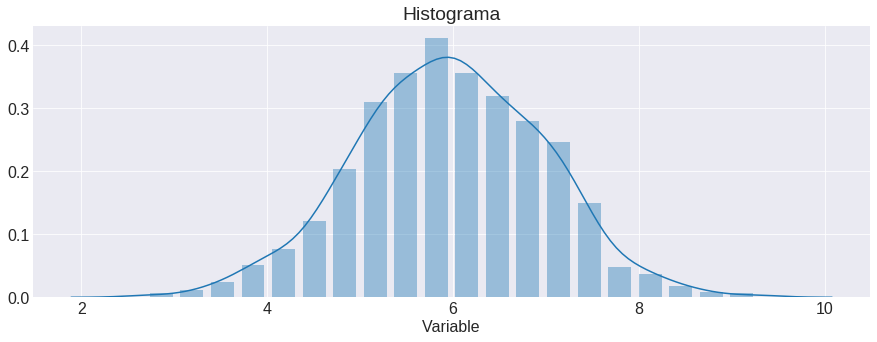

In [0]:
#@title Una distribución con la media en x = 6

import seaborn as sns
def hist_sea(y):
    plt.figure(figsize=(15,5))
    ax = plt.subplot(1,1,1)
    ax.set_title('Histograma')
    sns.distplot(y,bins=20, hist_kws={"rwidth":0.75},hist = True,ax=ax)
    ax.set_xlabel('Variable')
    return ax

plt.style.use('seaborn-darkgrid')
y = np.random.normal(6,1,1000)
ax = hist_sea(y)
plt.show() 

### Ventajas

* Fácil cálculo.
* Es única para cada conjunto de datos.
* Se interpreta como un punto de equilibrio o centro de masas. 
* Es útil para llevar a cabo procedimientos estadísticos como la comparación de medias de varios conjuntos de datos.
* Toma en cuenta todos y cada uno de los elementos de los datos.


### Desventajas

* Es una medida a cuyo significado depende la dispersión, de modo que cuanto menos homogéneos sean los datos, menos información proporciona.
* En el análisis real de la media no todos los valores contribuyen de la misma manera. Los valores altos tienen más peso que los valores cercanos a cero.

## La media ponderada

En muchos casos no todos los valores tiene la misma importancia y puede ser útil otorgar pesos o valores a los datos dependiendo de su relevancia para determinado estudio. En ese caso no se suman los valores uno a uno sino se halla una **suma ponderada**, al dividir por la suma de los pesos tenemos la media ponderada

$${\bar  {x}}={\frac  {\sum _{{i=1}}^{n}x_{i}w_{i}}{\sum _{{i=1}}^{n}w_{i}}}={\frac  {x_{1}w_{1}+x_{2}w_{2}+x_{3}w_{3}+...+x_{n}w_{n}}{w_{1}+w_{2}+w_{3}+...+w_{n}}}$$

### Pesos normalizados 

Para cada peso podríamos tener su peso normalizado como:
$${\displaystyle w'_{i}={\frac {w_{i}}{\sum _{k=1}^{n}w_{k}}}}$$

En ese caso se asegura que la suma de esos pesos sea:
$${\displaystyle \sum _{i=1}^{n}{w_{i}'}=1}$$

Y la media ponderada se calcula:
$${\displaystyle {\bar {x}}=\sum _{i=1}^{n}{w_{i}'x_{i}}}$$

In [0]:
#@title Hallar la media ponderada de 3 números

number_1 =  4#@param {type:"number"}
w_1 = 16 #@param {type:"slider", min:0, max:100, step:1}
number_2 = 5.0 #@param {type:"number"}
w_2 = 50 #@param {type:"slider", min:0, max:100, step:1}
number_3 = 1.0 #@param {type:"number"}
w_3 =  20#@param {type:"slider", min:0, max:100, step:1}

number = [number_1,number_2,number_3]
w = [w_1,w_2,w_3]
w_norm =  np.array(w)/sum(w)
print('Los pesos normalizados son:',w_norm)
sum_pond = sum(np.array(number)*w_norm)
sum_number = ''.join(['%.2f*%.2f + '%(number[i],w_norm[i]) for i in range(3)])[:-2]
print("La media ponderada es igual a ",sum_number,' = ',round(sum_pond,2))


Los pesos normalizados son: [0.18604651 0.58139535 0.23255814]
La media ponderada es igual a  4.00*0.19 + 5.00*0.58 + 1.00*0.23   =  3.88


## Media geométrica

En la media aritmética se suman los valores de la variables lo cual nos indica que hay un carácter aditivo, por ejemplo cuando se suman las diferentes edades para obtener una edad promedio. 

Sin embargo, hay variables que presentan variaciones acumulativas, por lo que ni la suma ni la media tienen un sentido real, por ejemplo, una rebaja del 50% sobre otra rebaja del 50% no hacen en total una rebaja del 100%, lo que alude a un caráter multiplicativo. 

$${\displaystyle {\bar {x}}={\sqrt[{n}]{\prod _{i=1}^{n}{x_{i}}}}={\sqrt[{n}]{x_{1}\cdot x_{2}\cdots x_{n}}}}$$

También tiene una versión ponderada:
$${\displaystyle {\bar {x}}=\left({\prod _{i=1}^{n}{x_{i}}^{\alpha _{i}}}\right)^{\frac {1}{\sum _{i}{\alpha _{i}}}}=\left({x_{1}}^{\alpha _{1}}{x_{2}}^{\alpha _{2}}\dots {x_{n}}^{\alpha _{n}}\right)^{\frac {1}{\alpha _{1}+\dots +\alpha _{n}}}}$$

Donde $\alpha_i$ son los pesos

In [0]:
#@title Hallar la media geométrica del crecimiento de una población en 3 años

pob_init = 10000 #@param {type:"integer"}
tasa_1 =  5#@param {type:"number"}
tasa_2 = 20 #@param {type:"number"}
tasa_3 =  50#@param {type:"number"}
tasa = [tasa_1,tasa_2,tasa_3]
media_a = sum([t/100 + 1 for t in tasa])/3 
media_geo = np.prod([t/100 + 1 for t in tasa])**(1/3) 
pob_acc = [pob_init]
pob_acc_1 = [pob_init]
pob_acc_2 = [pob_init]
for t in tasa:
  pob_acc.append(pob_acc[-1]*(1+t/100))
  pob_acc_1.append(pob_acc_1[-1]*(media_a))
  pob_acc_2.append(pob_acc_2[-1]*(media_geo))
pob = pd.DataFrame({'Pob Inicial':pob_acc[:-1],
                    'Pob Final':pob_acc[1:],
                    'Factor Crec':[t/100 + 1 for t in tasa],
                    'Factor Crec (M.A.)':media_a,
                    'Pob final (M.A.)':pob_acc_1[1:],
                    'Factor Crec (M.G.)':media_geo,
                    'Pob final (M.G.)':pob_acc_2[1:]},
                   index=['Año %i'%i for i in range(1,4)])

pob

,Pob Inicial,Pob Final,Factor Crec,Factor Crec (M.A.),Pob final (M.A.),Factor Crec (M.G.),Pob final (M.G.)
Año 1,10000.0,10500.0,1.05,1.25,12500.00,1.236386,12363.855899
Año 2,10500.0,12600.0,1.20,1.25,15625.00,1.236386,15286.493270
Año 3,12600.0,18900.0,1.50,1.25,19531.25,1.236386,18900.000000


### Ventajas
* Es menos sensible que la media aritmética a los valores extremos.
* Utiliza todos los datos.


### Desventajas
* Es de significado estadístico menos intuitivo que la media aritmética.
* Su cálculo es más difícil.
* Si un valor $x_i=0$ entonces la media geométrica se igual a cero.



## Mediana

La mediana es un punto que divide la muestra ordenada (de menor a mayor)
en dos grupos iguales (50% - 50%). Es un punto que está justo en mitad de la
muestra, y no tiene por qué coincidir con la media.



### Mediana para datos no agrupados

Supongamos que tenemos el grupo de datos no agrupados $x_{1},x_{2},x_{3},\ldots ,x_{n}$, los cuales están organizados de mayor a menor y $n$ es impar. La mediana sería:

$$M_{e}=x_{{(n+1)/2}}$$

<p align="middle"><img alt="A" height="350px" src="https://www.portaleducativo.net/ckeditor/imagen/uploaded/mediana_aritmetica_impar.png"></p>

Si $n$ es par, la mediana sería:
$$M_{e}=(x_{{{\frac  {n}{2}}}}+x_{{{{\frac  {n}{2}}}+1}})/2$$
<p align="middle"><img alt="A" height="400px" src="https://www.portaleducativo.net/ckeditor/imagen/uploaded/mediana_aritmetica_par.png"></p>

Imágenes sacadas de [portal](https://www.portaleducativo.net/octavo-basico/790/Media-moda-mediana-rango)



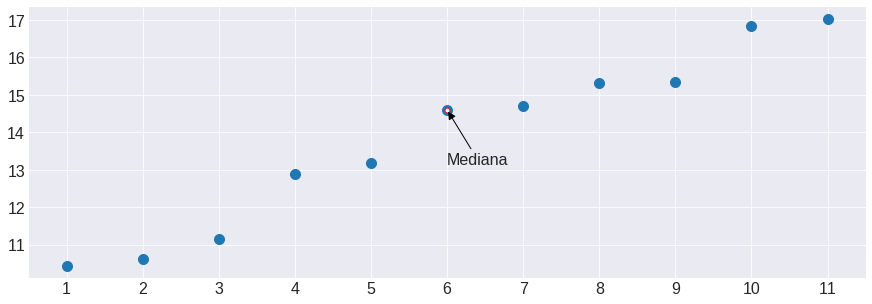

El conjunto de datos (organizados) es: [10.434 10.626 11.147 12.9   13.194 14.603 14.7   15.308 15.348 16.845
 17.032]
La mediana es: 14.603


In [0]:
#@title Hallar la mediana de un conjunto de números no agrupados
import matplotlib.ticker as ticker
cantidad = 15 #@param {type:"slider", min:1, max:50, step:1}
min_number =  9#@param {type:"number"}
max_number = 20 #@param {type:"number"}
datos = np.random.uniform(min_number,max_number,size=cantidad)
datos.sort()
pmedio = 0.5*(cantidad//2) + 0.5*(cantidad//2+1)if cantidad%2==0 else cantidad//2 +1
median = 0.5*datos[cantidad//2-1] + 0.5*datos[cantidad//2]if cantidad%2==0 else datos[cantidad//2]
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(range(1,cantidad+1),datos,'o ',ms=10)
ax.plot(pmedio,median,'or',markerfacecolor='w',ms=5)
ax.annotate('Mediana', xy=(pmedio, median), xytext=(pmedio, 0.9*median),
            arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3",facecolor='black'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))
plt.show()

with np.printoptions(precision=3, suppress=True):
  print('El conjunto de datos (organizados) es:',datos)
  print('La mediana es: %.3f'%median)

### Mediana para datos agrupados 

Los datos agrupados son aquellos que se presentan en una tabla de frecuencias. En este caso hay dos formas de calcular la mediana de forma aproximada:

* La más evidente, crear unos datos no agrupados organizando los valores y agregando datos según el número de veces que determine su frecuencia, luego hallar la mediana con el método anterior.

* O, suponer que los individuos están repartidos uniformemente en cada valor e interpolar utilizando triángulos semejantes.

El segundo método es más fácil de entender con un ejemplo:

In [0]:
#@title Hallar la mediana de un conjunto de números agrupados

cantidad = np.random.randint(1,10)
min_freq = 2 #@param {type:"slider", min:1, max:20, step:1}
max_freq = 13 #@param {type:"slider", min:1, max:20, step:1}
min_number =  9#@param {type:"number"}
max_number = 20 #@param {type:"number"}

datos = np.random.uniform(min_number,max_number,size=cantidad)
freq = np.random.randint(min_freq,max_freq,size=cantidad)
datos = pd.DataFrame({'Dato':datos,'Frecuencia':freq})
datos = datos.sort_values(by='Dato')
datos['Frec Acum']=list(accumulate(datos['Frecuencia']))
datos


,Dato,Frecuencia,Frec Acum
1,9.436566,6,6
6,10.697848,4,10
3,12.143726,6,16
8,13.016314,4,20
2,14.169944,7,27
0,16.160766,12,39
4,16.364312,6,45
7,16.966755,9,54
5,18.022974,10,64


In [0]:
#@title Mediana de un conjunto de números agrupados
total = datos['Frec Acum'].iloc[-1]
pmedio = 0.5*(total//2) + 0.5*(total//2+1)if total%2==0 else total//2 +1
if total%2!=0:
  median=datos[datos['Frec Acum'] >= pmedio]['Dato'].iloc[0]
  print("La mediana es la variable que ocupe el puesto", pmedio,'cuyo valor es:%f'%median)
else:
  median1=datos[datos['Frec Acum'] > pmedio]['Dato'].iloc[0]
  median2=datos[datos['Frec Acum'] > pmedio]['Dato'].iloc[1]
  median=median1*0.5+median2*0.5
  print("La mediana es el promedio entre los puestos [%d,%d]"%(pmedio//1,pmedio//1 +1),'cuyo valor es:%f'%median)
i1 = datos[datos['Frec Acum'] < pmedio].index[-1]
i2 = np.concatenate([np.array([i1]),datos[datos['Frec Acum'] >= pmedio].index.values[0:2]])
datos.loc[i2]


La mediana es el promedio entre los puestos [32,33] cuyo valor es:16.262539


,Dato,Frecuencia,Frec Acum
2,14.169944,7,27
0,16.160766,12,39
4,16.364312,6,45


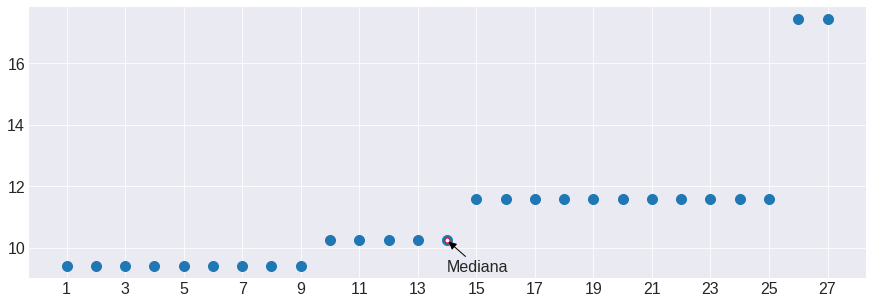

In [0]:
#@title Gráfica mediana de datos agrupados
fig,ax = plt.subplots(figsize=(15,5))
datos_flatt = datos['Dato'].repeat(datos['Frecuencia'].values).values
ax.plot(range(1,total+1),datos_flatt,'o ',ms=10)
ax.plot(pmedio,median,'or',markerfacecolor='w',ms=5)
ax.annotate('Mediana', xy=(pmedio, median), xytext=(pmedio, 0.9*median),
            arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3",facecolor='black'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=2, offset=0))
plt.show()

## Moda

La moda representa el valor (o valores) más frecuentes del conjunto de datos.





### Ventajas
* Cálculo sencillo.
* Interpretación muy clara.
* Al depender sólo de las frecuencias, puede calcularse para variables cualitativas. 



### Desventajas
* Su valor es independiente de la mayor parte de los datos, lo que la hace muy sensible a variaciones muestrales.

* Usa muy pocas observaciones, de tal modo que grandes variaciones en los datos fuera de la moda, no afectan en modo alguno a su valor.

* Puede haber más de una moda.

## Interpetación de las medidas de tendencia central

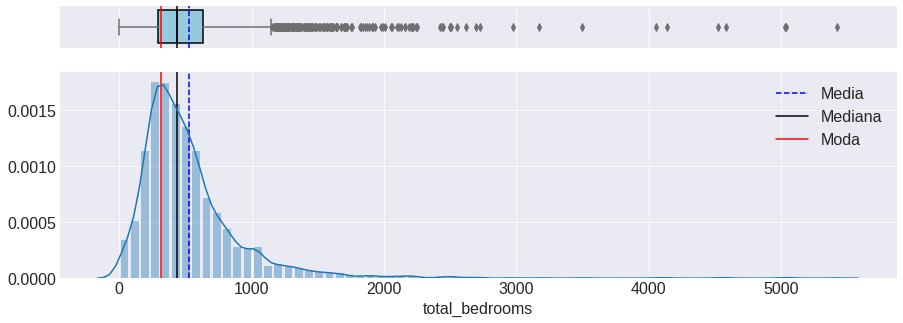

In [0]:
#@title Medidas de tendecia central

data = pd.read_csv('sample_data/california_housing_test.csv')
def central_measures(data):
  f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)},figsize=(15,5))
  [axi.axvline(data.mean(),color='b',ls='--',label='Media') for axi in ax]
  [axi.axvline(data.median(),color='k',label='Mediana') for axi in ax]
  [axi.axvline(data.mode().iloc[-1],color='r',label='Moda') for axi in ax]
  sns.boxplot(data, ax=ax[0],color='skyblue',medianprops={'color':'black'})
  [a.set_edgecolor('black')for a in ax[0].artists]
  ax[0].set(xlabel='')
  sns.distplot(data,bins=70, hist_kws={"rwidth":0.75},hist = True,ax=ax[1])

  ax[1].legend()
  plt.show()

columna = 'total_bedrooms' #@param ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']
central_measures(data[columna])

# Medidas de dispersión

Las medidas de tendencia central no son suficientes para describir un conjuntos de datos, ya que estos se distribuyen entre los valores máximo y mínimo de distintas formas. Así que se considera vital saber la forma en cómo se concentran los datos alrededor de un valor central o posición, estás medidas se conocen cómo  **medidas de dispersión**

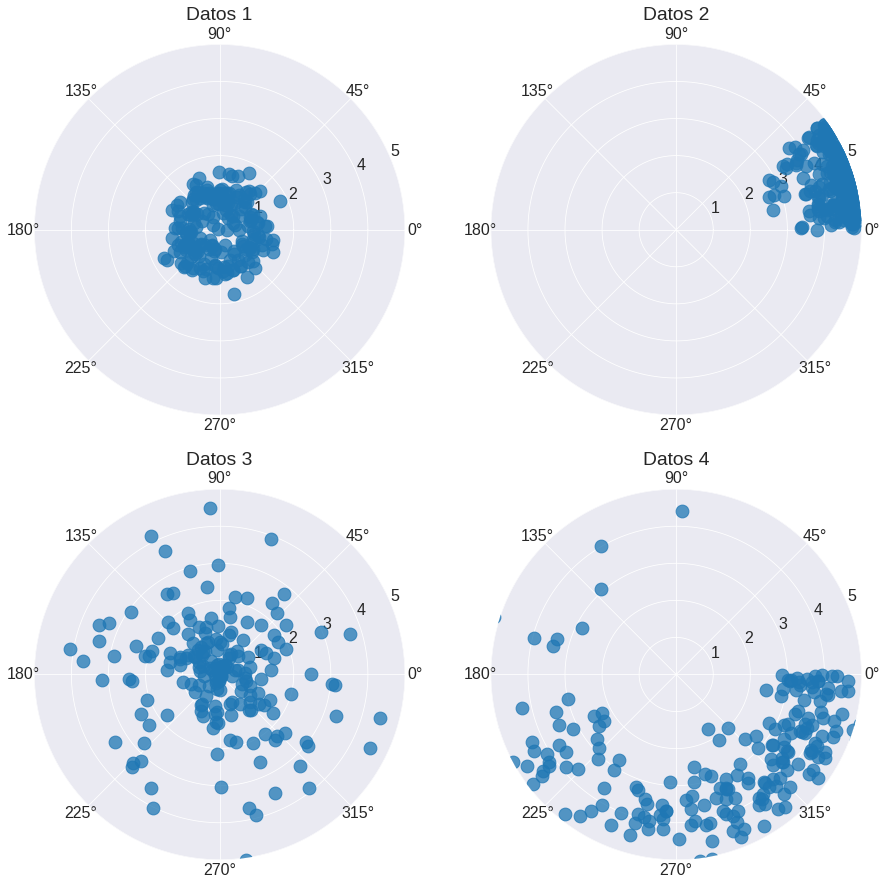

In [0]:
#@title Entendiendo la dispersión de datos
fig = plt.figure(figsize=(15,15))
N = 200

r = [np.abs(np.random.normal(1,0.3,N)),
     np.abs(5-np.random.exponential(0.5,N)),
     np.abs(np.random.normal(1,2,N)),
     np.abs(np.random.normal(4,0.7,N))]
theta = [2 * np.pi * np.random.uniform(0,1,N), 
         2 * np.pi * np.random.uniform(0,0.1,N),
         2 * np.pi * np.random.uniform(0,1,N),
         2 * np.pi * np.random.beta(4,1,N)]
area = 50 * r[0].max()**2
for i in range(4):
  ax = fig.add_subplot(2,2,i+1, projection='polar')
  ax.set_title('Datos %d'%(i+1))
  c = ax.scatter(theta[i], r[i], s=area, cmap='hsv', alpha=0.75)
  ax.set_rlim(0, 5)


## Medidas de Rangos

### Rango
El Rango es el intervalo entre el valor máximo y el valor mínimo, cuanto mayor es el rango, más dispersos están los datos. 

### Rango medio 
El Rango es la media del menor y mayor valor de un conjunto de datos, o la mitad del camino entre el dato de menor valor y el dato de mayor.

### Rango intercuartílico

Rango intercuartílico o rango intercuartil, a la diferencia entre el tercer y el primer cuartil de una distribución (pos 25%, pos 75%).

* Primer cuartil (Q1) como la mediana de la primera mitad del conjunto de datos
* Segundo cuartil (Q2) como la propia mediana del conjunto de datos
* Tercer cuartil (Q3) como la mediana de la segunda mitad del conjunto de datos

In [0]:
#@title Rangos
data = pd.DataFrame({'vmax':[ri.max() for ri in r],
                     'vmin':[ri.min() for ri in r],
                     'rango':[ri.max()-ri.min() for ri in r],
                     'rango medio':[0.5*ri.max()+0.5*ri.min() for ri in r],
                     'IRC':[np.percentile(ri,75)-np.percentile(ri,25) for ri in r],
                     },index=['Datos #%d'%(i+1) for i in range(4)])
data

,vmax,vmin,rango,rango medio,IRC
Datos #1,1.815297,0.044522,1.770775,0.929910,0.363719
Datos #2,4.998081,2.654965,2.343116,3.826523,0.556159
Datos #3,6.090755,0.011586,6.079169,3.051171,1.657052
Datos #4,5.536067,1.698477,3.837590,3.617272,0.893903


## Medidas de Desviación

Las medidas de desviación son medidas que comparan los valores del conjunto de datos con la media de los datos. 

### Varianza
La varianza es una medida de dispersión, que es la media de los cuadrados de las distancias entre los puntos y el valor medio de todo el conjunto.

$${\displaystyle \sigma _{n}^{2}={\frac {1}{n}}\sum _{i=1}^{n}\left(x_{i}-{\overline {X}}\right)^{2}=\left({\frac {1}{n}}\sum _{i=1}^{n}x_{i}^{2}\right)-{\overline {X}}^{2}={\frac {1}{n^{2}}}\sum _{i=1}^{n}\sum _{j>i}\left(x_{i}-x_{j}\right)^{2}}$$

###Desviación estándar

Es conocida como la raíz cuadrada de la variancia:

$${\displaystyle \sigma ={\sqrt {{\frac {1}{n}}\sum _{i=1}^{n}(x_{i}-\mu )^{2}}}}$$

## Sesgo de la variancia 

Podemos entender el sesgo estadístico con los datos #1 y #2. Ambos datos se concentran alrededor de un punto pero si tomamos el centro de la gráfica como el punto de equilibrio (o el valor real al que deseamos llegar), es claro que los datos #2 tiene un sesgo o un desplazamiento en sus valores.

En estadística podemos establecer la presencia de este sesgo por medio de una comparación entre la media poblacional (esperanza), algo netamente probabilístico, con su valor numérico. Si lanzamos un dado equilibrado cada cara tiene la misma probabilidad de salir y ese valor esperado es igual a su media aritmética (3.5).  

En cambio la varianza si es sesgada, es decir su esperanza depende del tamaño de la muestra en un factor de $\dfrac{n-1}{n}$, para muestras grandes esto no es importante pero para muestras más pequeñas se suele hacer una corrección de sesgo: 

$${\displaystyle \hat\sigma _{n}^{2}={\frac {n}{n-1}}\sum _{i=1}^{n}\left(x_{i}-{\overline {X}}\right)^{2}}$$

Y para la desviación
$${\displaystyle \hat\sigma ={\sqrt {{\frac {1}{n-1}}\sum _{i=1}^{n}(x_{i}-\mu )^{2}}}}$$

### Desviación media

La desviación promedio absoluta es la media de los valores absolutos de las distancias entre cada valor en el conjunto de datos y la media.

$$ D_m = \frac{1}{n} \sum_{i=1}^n
 \left| x_i - \overline{x} \right|$$

 ### Desviación mediana

La desviación mediana absoluta es la mediana de los valores absolutos de las distancias entre cada valor en el conjunto de datos y la media.

 $$ D_{me} = MD(
 {\left| x_i - \overline{x} \right|}_{i=1,...,n})$$

### Coeficiente de variación de pearson

Medida de dispersión adimensional, que se expresa tanto de forma decimal como en tanto por ciento, y nos expresaría la desviación típica como porcentaje con respecto a la media.

 $$ CV = \dfrac{\sigma}{\bar x}$$



In [0]:
#@title Rangos y desviaciones
data['var'] = [ri.var() for ri in r]
data['std'] = [ri.std() for ri in r]
data['avgd'] = [sum(np.abs(ri -ri.mean()))/N for ri in r]
data['me_d'] = [np.percentile(np.abs(ri -ri.mean()),50) for ri in r]
data['cv'] = [ri.std()/ri.mean() for ri in r]
data

,vmax,vmin,rango,rango medio,IRC,var,std,avgd,me_d,cv
Datos #1,1.815297,0.044522,1.770775,0.929910,0.363719,0.094670,0.307686,0.237847,0.184279,0.310921
Datos #2,4.998081,2.654965,2.343116,3.826523,0.556159,0.251925,0.501921,0.385727,0.336740,0.112775
Datos #3,6.090755,0.011586,6.079169,3.051171,1.657052,1.726278,1.313879,1.059438,0.889600,0.779528
Datos #4,5.536067,1.698477,3.837590,3.617272,0.893903,0.488749,0.699106,0.557156,0.446992,0.183249


## Figuras comparativas

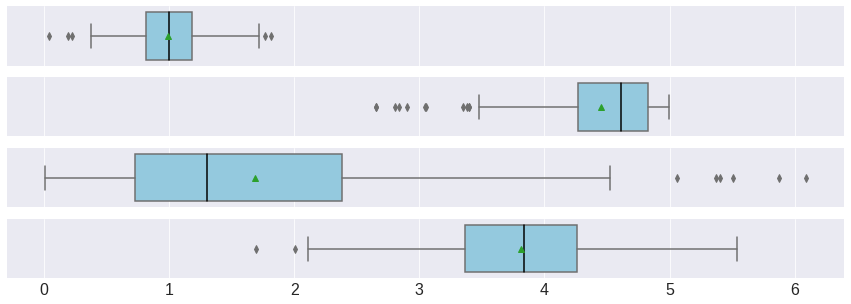

In [0]:
#@title Figuras de caja y bigotes
f, ax = plt.subplots(4, sharex=True, figsize=(15,5))
for i in range(4):
  sns.boxplot(r[i], ax=ax[i],color='skyblue',medianprops={'color':'black'},showmeans=True)

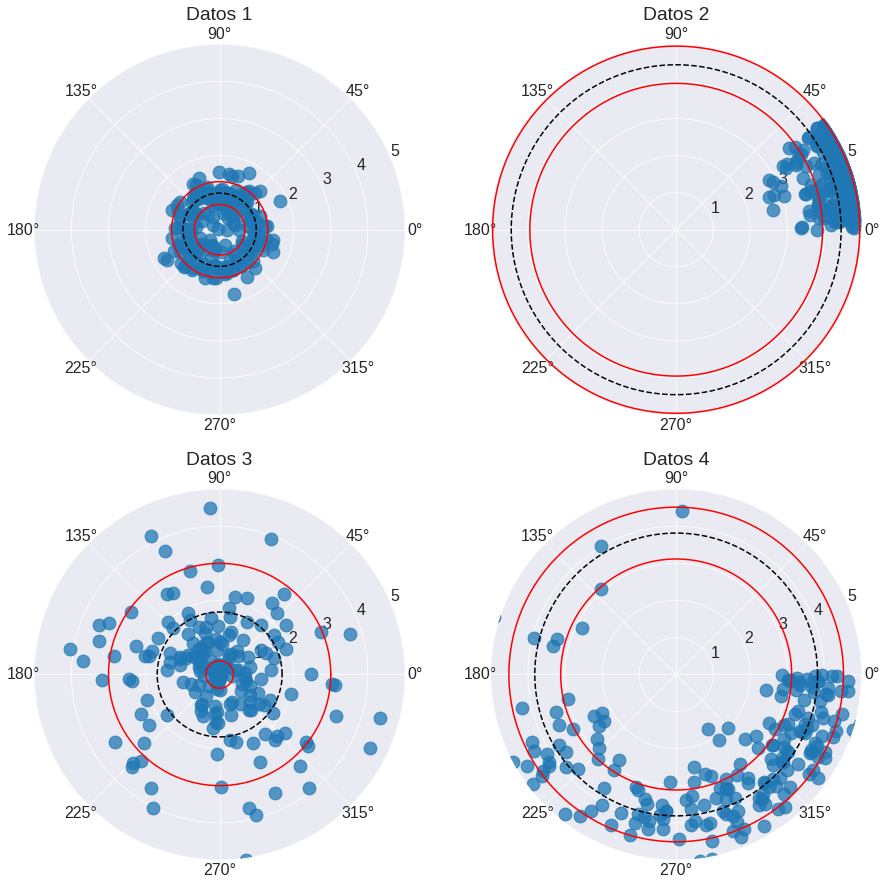

In [0]:
#@title La media y las desviación estándar 
fig = plt.figure(figsize=(15,15))
for i in range(4):
  ax = fig.add_subplot(2,2,i+1, projection='polar')
  ax.set_title('Datos %d'%(i+1))
  c = ax.scatter(theta[i], r[i], s=area, cmap='hsv', alpha=0.75)
  c = ax.plot(np.linspace(0,2*np.pi,N), np.repeat(r[i].mean() + r[i].std(),N),color='r')
  c = ax.plot(np.linspace(0,2*np.pi,N), np.repeat(r[i].mean() - r[i].std(),N),color='r')
  c = ax.plot(np.linspace(0,2*np.pi,N), np.repeat(r[i].mean() ,N),'k--')
  ax.set_rlim(0, 5)

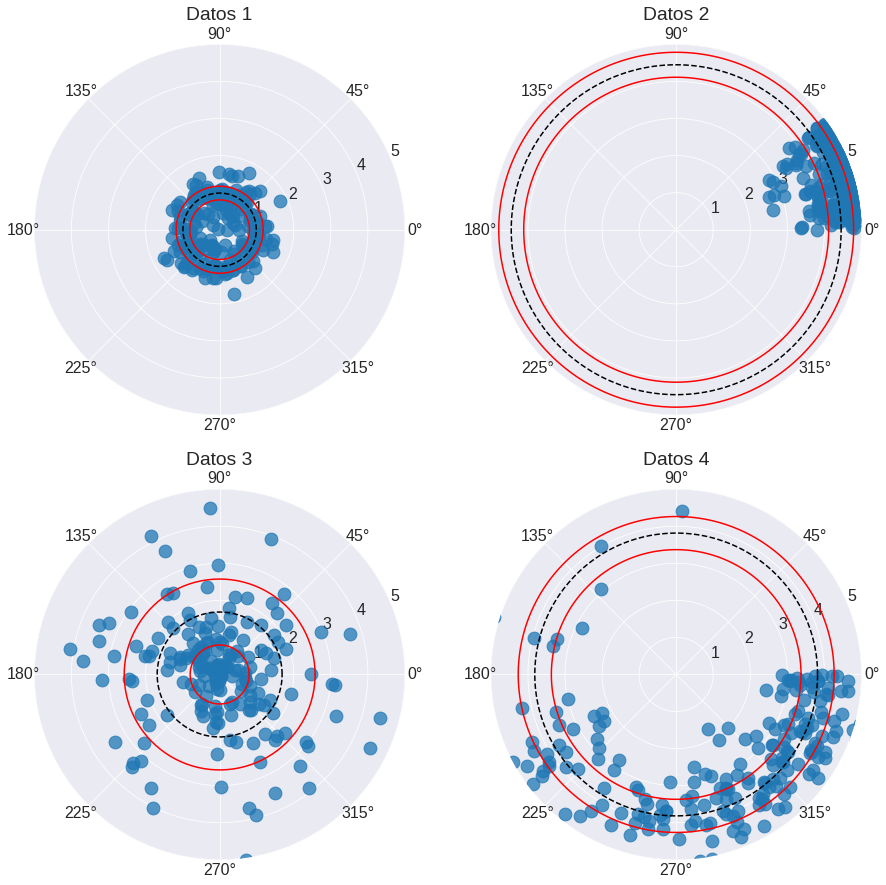

In [0]:
#@title La media y las desviación media 
fig = plt.figure(figsize=(15,15))
for i in range(4):
  ax = fig.add_subplot(2,2,i+1, projection='polar')
  ax.set_title('Datos %d'%(i+1))
  c = ax.scatter(theta[i], r[i], s=area, cmap='hsv', alpha=0.75)
  c = ax.plot(np.linspace(0,2*np.pi,N), np.repeat(r[i].mean() + data['me_d'].iloc[i],N),color='r')
  c = ax.plot(np.linspace(0,2*np.pi,N), np.repeat(r[i].mean() - data['me_d'].iloc[i],N),color='r')
  c = ax.plot(np.linspace(0,2*np.pi,N), np.repeat(r[i].mean() ,N),'k--')
  ax.set_rlim(0, 5)

#Funciones

Usualmente es común encontrarnos en la vida diaria con que algunas variables dependen de otras, es fácil pensar en cómo el salario de un trabajador depende del número de horas que trabaje, la producción total de una fábrica depende de la cantidad de máquinas que tenga en uso. Este tipo de relaciones suele expresarse como una función. 

Podemos considerar una función como una correspondencia de un conjunto con otro. Si $y$ es función de $x$ entonces existe una regla para asociar un único valor de $y$ a cada $x$. Esta regla es usualmente expresada como una Ecuación.
Pensemos lo anterior con un ejemplo:




In [0]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Intente en el siguiente

In [0]:
def y(x):
  return x**2
y(3) #cambie el valor de dentro de el paréntesis, puede usar cualquier número Real

9

Este mismo ejemplo puede ser un poco aplicado a la realidad

## Ejemplo 1

La potencia disipada por una bombilla de filamento está dada por la relación 

$P = I^2 R $

Donde $P$ es la potencia disipada,  $I$ es la corriente que circula por el filamento y $R$ es la resistencia al paso de dicha corriente.

1.   Con ayuda de la siguiente tabla dé 5 valores de potencia en KiloWatts correspondientes a 5 valores de corriente diferentes para una bombilla de 500 $\Omega$




In [0]:
def Potencia(I):
  return 500*I**2

In [0]:
My_list =[1,2,3,4,5] #Ingrese acá sus 5 valores de Corriente separados por coma entre los corchetes cuadrados
P = []
for i in range (len(My_list)):
  Pot  = Potencia(My_list[i])/1000
  P.append(Pot)
df = pd.DataFrame({"P": P}, index=My_list)
df


,P
1,0.5
2,2.0
3,4.5
4,8.0
5,12.5


En el caso anterior existe una pequeña curiosidad matemática. La potencia como función de la corriente $P(I)$ es equivalente a $P(-I)$, y esto no tiene problema con lo que hemos dicho hasta ahora sobre lo que es una función. Podemos verlo de la siguiente manera:

Una función $y(x)$ tiene un Dominio y un Rango. El dominio es el conjunto de los posibles valores que puede tomar la variable $x$ en este caso (la llamaremos de ahora en adelante variable independiente) el rango son el conjunto de posibles valores que toma $y$ dado un conjunto de valores de $x$. Para el caso anterior, si suponemos que tenemos un generador de corrientes lo suficientemente poderoso en principio (e ignorando la física del asunto al hablar de corrientes negativas) el dominio de nuestra función abarca el intervalo  $ (-\infty,\infty)$ sin embargo nuestro Rango va de $[0,\infty)$.

Veamos un caso diferente en el siguiente ejemplo:





<p><a name="Ej2"></a></p>

## Ejemplo 2
En ciertas circunstancias, la probabilidad en porcentaje de encontrar un electrón en una válvula termoiónica excluyendo una sección de longitud $l$ está dada por la relación

$P(l) = k \sqrt{1-\frac{l}{L}}$

2.   ¿Cuál es el dominio y el rango en este caso?

Como es usual, primero se reconoce el dominio, y dado este se reconoce el rango. Notemos que en el caso dedesear que nuestra probabilidad sea un número real como un porcentaje necesitamos que el radicando (lo que está dentro del radical) sea mayor o igual a cero, es decir: 

$1-\frac{l}{L}\geq 0 $

o lo que es lo mismo

 $l\leq L$

 Esto implica que el dominio de l está dado por el intervalo $[0,L]$.Alguien podría notar que el intervalo solución matemáticamente hablando podría ser $[-L,L]$, pero dado que las longitudes negativas no tienen sentido físico pasaremos de ellas.

Dada esta condición y sabiendo que $k$ es un factor de normalización igual a $100\%$ para que $P(l)$ sea un porcentaje entonces podemos saber que en los casos en los cuales $l=0$ la probabilidad de encontrar el electrón en la válvula es 
$P(0) = 100\%$

Ahora en el caso en que la zona de exclusión es $L$ la probabilidad de encontrar el electrón fuera de la válvula es 
 $P(L) = 0\%$

 Es importante darnos cuenta que para este caso cualquier otro valor entre $[0,100]$ estará contenido para cualquier valor en el dominio.

¡Inténtelo! suponga que $L=10$cm.

In [0]:
def Probability1(l):
  return (100*(1-(l/10))**(0.5) )

In [0]:
Probability1(2) #Cambie el valor dentro del paréntesis para calcular la probabilidad en porcentaje

89.44271909999159

Definamos entonces formalmente una Función:

---


## Definición: Función
Una definición es un conjunto de pares ordenados $(x,f)$ en los que no existen 2 pares diferentes que compartan el mismo primer número. El Dominio será el conjunto de valores admisibles para $x$ y el rango será el conjunto de los valores admisibles para $y$. Entonces expresamos $f(x)$ y decimos que $f$ es función de $x$


---


### Función Seno
Algunas de las características de la función Seno es que es periódica impar, eso significa que para todo $x$, $Sen(-x) = -Sen(x)$, y que dicha función se repite cada tanto, es decir $Sen(x) = Sen(x+2\pi)$. Siendo $2\pi$ el periodo. Dicho esto, es válido aclarar que la función Seno tiene su dominio en todos los reales, pero ¿Cuál es su rango?

En general, una función es periódica si $f(x) = f(x+\omega)$ siendo $\omega$el periodo, par si $f(-x) = f(x)$, e impar si $ f(-x) = -f(x)$.

Acontinuación se encuentra una sección en la que se puede calcular el Seno de un valor y en la que se grafica la función Seno, varie los valores del intervalo de $x$ de la función a graficar y el argumento de la función a calcular.

0.963558185417193


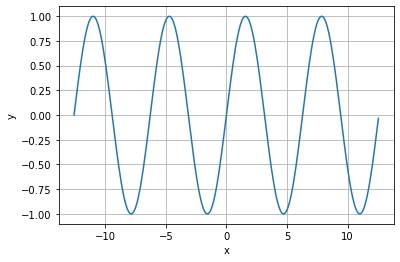

In [0]:
def Seno(t):
  return np.sin(t)

print(Seno(1.3)) #Cambie el valor entre el paréntesis interior, esto arrojará la función seno evaluada en dicho valor

xg = np.arange(-4*np.pi,4*np.pi,0.1) #Acá se está definiendo el intervalo de x sobre el cuál se hará la gráfica
yg = Seno(xg) #¿Qué pasa si cambiamos la gráfica, si graficamos el Seno(2*xg)?

plt.plot(xg,yg)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Función Coseno
La función Coseno es bastante similar a la función Seno, de hecho, no solo gráficamente sino en todo aspecto matemático puede ser tratada como una función Seno corrida por un factor de $\frac{\pi}{2}$, es decir:

$\cos(x) = \sin(x+\frac{\pi}{2})$

Por lo que cumple la propiedad de periodicidad, pero en lugar de la imparidad, cumple con la paridad. Realicemos el mismo ejercicio anterior.

0.26749882862458735


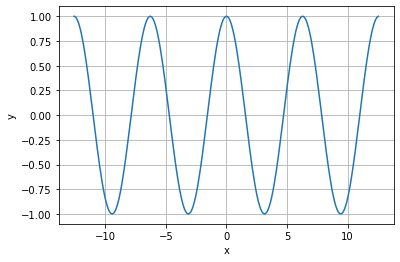

In [0]:
def Coseno(t):
  return np.cos(t)

print(Coseno(1.3)) #Cambie el valor entre el paréntesis interior, esto arrojará la función coseno evaluada en dicho valor

xg = np.arange(-4*np.pi,4*np.pi,0.1) #Acá se está definiendo el intervalo de x sobre el cuál se hará la gráfica
yg = Coseno(xg) #¿Qué pasa si cambiamos la gráfica, si graficamos el coseno(2*xg)?

plt.plot(xg,yg)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Existen otras funciones trigonométricas además del Seno y Coseno, más adelante veremos algunas de ellas.

### Función Logaritmo
La función logaritmo puede ser definida de muchas formas, una de las más sencillas de entender es por comparación con un exponente.

$\log_b x = n \quad \Leftrightarrow\ \quad x = b^n\,$

La expresión anterior se puede entender de la siguiente forma: El logaritmo en base $b$ de $x$ es igual a $n$ si y solo si $x$ es igual a $b$ a la $n$.

Algunas de las curiosidades del logarimo de cualquier base son:



1.   Solo están definidas para valores del dominio no negativas, es decir, su intervalo de dominio está dado por $(0,\infty)$, pero su rango es $(-\infty,\infty)$
2.   Sin importar su base siempre corta al eje $x$ en $x=1$ o lo que es lo mismo
$\log_t 1=0$ para cualquier $t$



0.26236426446749106


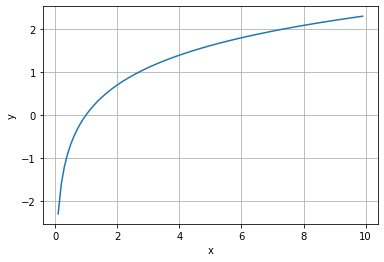

In [0]:
def Ln(t):
  return np.log(t)

print(Ln(1.3)) #Cambie el valor entre el paréntesis interior
xg = np.arange(0.1,10,0.1) #Acá se está definiendo el intervalo de x sobre el cuál se hará la gráfica
yg = Ln(xg) 

plt.plot(xg,yg)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Función Exponencial
Al igual que el logaritmo existen múltiples formas de definir la exponencial... Como anécdota interesante, Jacob Bernoulli estudiaba la forma de hacer dinero, y se preguntaba qué sería más ventajoso, cobrar intereses una vez al año o dos veces al año. Razonó de la siguiente forma:

Si tenía una corona invertida y algún banco le diera (suponiendo) un interes del $100\%$ anual, al cabo de un año tendría 2 coronas. Sin embargo si hablaba con el banco que le diera al cabo de 6 meses la mitad de los intereses de un año, a los primeros 6 meses tendría $1.5$ coronas, pues aumentó en un $50\%$ que reinvertiría, lo que le daría otra vez la mitad al cabo de otros 6 meses¿verdad?

En total si llevamos la cuenta sería 2.25, matemáticamente lo vemos así, inicialmente me dan $(1+\frac{1}{2})$, luego ese valor se le saca la mitad y eso me lo añaden al monto, equivalente a multiplucar los $1.5*(1+\frac{1}{2})$, o lo que es lo mismo $(1+\frac{1}{2})*(1+\frac{1}{2})$ ¡Mucho mejor! ahora llevamos mucho más al año que las 2 coronas... veamos qué tal nos va si lo hacemos con 3 veces al año... por cuatrimestre, en este caso sería 

$(1+\frac{1}{3})*(1+\frac{1}{3})*(1+\frac{1}{3})=(1+\frac{1}{3})^3=2.37$ y esto va subiendo... qué pasará si hacemos este proceso pero con un número tan grande de contribuciones $N$
Pues finalmente obtendríamos

$(1+\frac{1}{N})^N$

Pues cuando hacemos que $N$ sea muy grande (o tienda a $\infty$) esta relación anterior converge a $e\approx2.71828$, este es el número de Euler.

Ahora bien una función exponencial es el número $e^x$.

###Curiosidades

1. Tiene como Dominio $(-\infty,\infty)$ y rango $(0,\infty)$.
2. Es la función inversa al $\ln = \log_e$, es decir

$e^{\ln x} =\ln{e^x}= x$

3.6692966676192444


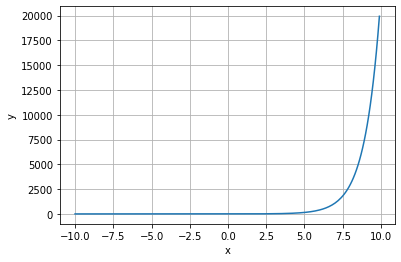

In [0]:
def e(t):
  return np.exp(t)
print(e(1.3)) #Cambie el valor entre el paréntesis interior
xg = np.arange(-10,10,0.1) #Acá se está definiendo el intervalo de x sobre el cuál se hará la gráfica
yg = e(xg) 

plt.plot(xg,yg)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Distribuciones de probabilidad

La teoría de probabilidades y la estadística representan áreas, o pilares fundamentales, en la ciencia de datos. De hecho, el **aprendizaje de máquinas** (Machine Learning - ML) y la **inteligencia artificial** (Artificial Intelligence) se alimentan enormemente de la matemática estadística y algebra lineal. Por tal motivo, es imperativo desarrollar una buena compresión matemática con el fin de comprender los diferentes algoritmos ML. 

A continuación, estudiaremos las principales distribuciones de probabilidad usadas en la literatura de ML. Los tópicos que abordaremos en esta sesión serán los siguientes:

- Conceptos de probabilidad: Variables aleatorias, curva de densidad, funciones de probabilidad, etc.

- Diferencia entra distribuciones de probabilidad y as funciones de distribución.

## Variables aleatorias

Una variable aleatoria corresponde a una variable cuyos valores posibles son valores numéricos procedentes de un fenómeno aleatorio. Algunos ejemplos son:

- Presion Arterial.
- Lanzamiento de un dado.
- Precio de una casa en una fecha dada.
- Puntaje obtenido cuando se lanza un dardo a una Diana.

Detro de los tipos de variables aleatorias tenemos dos grandes grupos, a saber, las variables aleatorias discretas y las variables aleatorias continuas.

### Variables aleatorias discretas:

Una variable aleatoria discreta correponde a aquella cuyo valor puede variar dentro de un conjunto finito y contable de valores. En el caso de un dado, por ejemplo, podemos definir una variable aleatoria $X$ de tal forma que dicha puede obtener cualquiera de los valores $[1,2,3,4,5,6]$. Además, cada valor obtenido esta caracterizado por un proceso aleatorio.

La **distribución de probabilidades** de una variable aleatoria discreta es una lista de probabilidades asociadas a cada uno de los valores discretos de dicha variable. A la distribución de probabilidades también se le conoce con el nombre de **función de probabilidad** o **función de masa de probabilidad**. Matematicament, supongamos que una variable aleatoria discreta $X$ pueda tener $k$ valores diferentes. Entonces, la probabilidad de que $X=x_i$ se define como $P(X=x_i)=p_i$. Las probabilidades $p_i$ deben satisfacer las siguientes condiciones:

1. $0<p_i<1$ $\forall$ $i=1, 2, \cdots,k$.
2. $\sum_{i=0}^k p_i=1\rightarrow p_1 + p_2 + \cdots + p_k=1$.

Algunos ejemplos de distribuciones de probabilidades discretas son:

- La distribución de Bernoulli. 
- La distribución Binomial.
- La distribución de Poisson.





### Variables Aleatorias Continuas:

Una **variable aleatoria continua** es aquella que puede tomar un valor dentro de un conjunto infinito (y no discreto) de valores. Por ejemplo, una variable aleatoria continua $X$ podría estar definida como la altura de una persona. El conjunto de valores de una variable continua aleatoria será representado matemáticamente como un intervalo. 

La distribución de probabilidad de una variable aleatoria continua, conocida como **función/funciones de distribución de probabilidad**, son funciones que toman valores continuos. La probabilidad de observar cualquier valor individual es igual 0 ya que el número de valores que puede asumir la variable aleatoria es infinito. Por ejemplo, una variable aleatoria $X$ puede tomar todos los valores en un intervalo de números reales. Entonces, la probabilidad de que X esté en el conjunto de resultados $A$, $P(A)$, se define como el área por encima de $A$ y debajo curva o función de distribución. 

![alt text](https://github.com/diplomado-bigdata-machinelearning-udea/curso0/blob/master/S01/c_var_prob.png?raw=true)

La curva, que representa una función $p(x)$, debe satisfacer las siguientes condiciones:

1. La curva no puede tener valore negativos, es decir, $p(x)>0$ $\forall$ $x$.
2. El área total bajo la curva es igual a uno.

A una curva que cumple con estas condiciones se le conoce como curva de densidad, o **densidad de probabilidades**. Algunos ejemplos de distribuciones de probabilidades continuas son:

- Distribución normal.
- Distribución Exponencial. 
- Distribución Beta.

## Función de distribución acumulativa (CDF - Cumulative distribution function)

En teoría de probabilidades y estadística, la función de distribución cumulativa de una variable real aleatoria $X$, evaluada en $x$, es la probabilidad de que $X$ tome valores iguales o menores que $x$. Matemáticamente se denota como

\begin{equation}
  F_X(x)=P(X\leq x)
\end{equation}

Resulta facil ver que la probabilidad $F_X(x)$ resulta de una suma o integral acumulada sobre los valores de probabilidad dados por la distribución. Más adelante veremos unos ejemplos que clarificarán este concepto.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8,8)})

## Distribución uniforme

La distribución más simple y útil de todas corresponde a la **distribución uniforme**. Esta distribución, o densidad de probabilidad, puede escribirse matemáticamente como

\begin{equation*}
  f(x) = \begin{cases}
        \frac{1}{b-a} \text{ si } a\leq x \leq b,
        \\
        0 \text{ si } x<a \text{ o } x <b
        \end{cases}
 \end{equation*} 

Debido a que cualquier intervalo de números de igual ancho tienen la misma probabilidad de ser observado, la curva que describe la distribución es un rectángulo cuya altura es contante dentro del intervalo y 0 en fuera de este. Como el área bajo la curva debe ser igual a 1, la longitud del intervalo determina la altura de curva. En la siguiente figura se ilustra una distribución uniforme en el intervalo $(a,b)$

<img src="https://github.com/diplomado-bigdata-machinelearning-udea/curso0/blob/master/S01/Uniform_distribution_PDF.png?raw=true" class="centerImage" alt="CH Logo" height="300" width="400">




A continuación, generemos una distribución uniforme en python con la ayuda de un generador de números aleatorios de números en el intervalo $(a,b)$. Por el momento, no nos preocuparemos de la sintaxis en `python`, solo en las características principales de la distribución como:

- `n`: Numero de muestras.
- `inicio`: Inicio del intervalo
- `ancho`: Ancho del intervalo

### Función de distribución acumulativa


### Ilustración de la función densidad de probabilidad


In [0]:
# Librería para generar una distrubición de números aleatorios siguiendo una distribución uniforme.
from scipy.stats import uniform

In [0]:
# random numbers from uniform distribution
n = 100000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

[Text(0, 0.5, 'Frecuencia'), Text(0.5, 0, 'Distribución uniforme')]

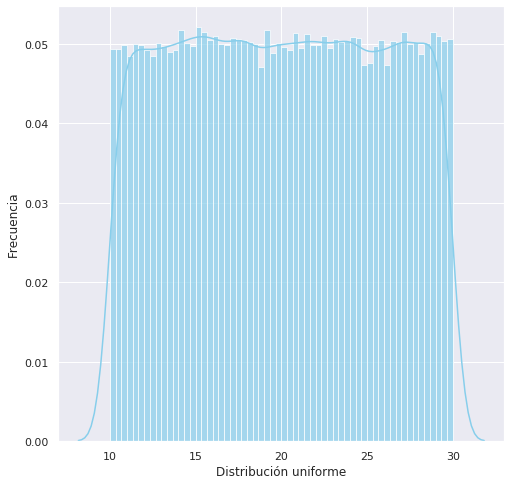

In [0]:
ax = sns.distplot(data_uniform, bins=60, kde=True, color='skyblue', hist_kws={"linewidth": 1,'alpha':0.7})
ax.set(xlabel='Distribución uniforme', ylabel='Frecuencia')

**Ejercicio:** Verifique que el histograma está normalizado. 
Nota: Despliegue una celda de código y úsela como calculadora. 

Haga doble click **aquí** para ver la respuesta

<!------------
# De la gráfica se tiene que el ancho del intervalo es:
ancho = 30-10

# De la gráfica se obtiene que la altura es 0.05, por lo tanto, el área bajo la curva es

ancho*0.05

------>

### Función de distribución de probabilidad acumulativa

La función de distribución cumulativa de una distribución normal esta dada por la ecuación:

\begin{equation*}
  f(x) = \begin{cases}
        0 \text{ si } x < a,
        \\
        \frac{x-a}{b-a} \text{ si } \text{ si } x\leq a <b
        \\
        0 \text{ si } x \geq b
        \end{cases}
 \end{equation*}

 Si lo pensamos detenidamente, la probabilidad sería la razón del ancho de la distribución entre $a$ y $x$, es decir $x-a$, sobre el ancho total del la distribución $b-a$, siempre y cuando $x\in[a,b]$.

 Veamos gráficamente la función cumulativa en el caso del intervalo definido en la función inicial, definido entre [10,30].




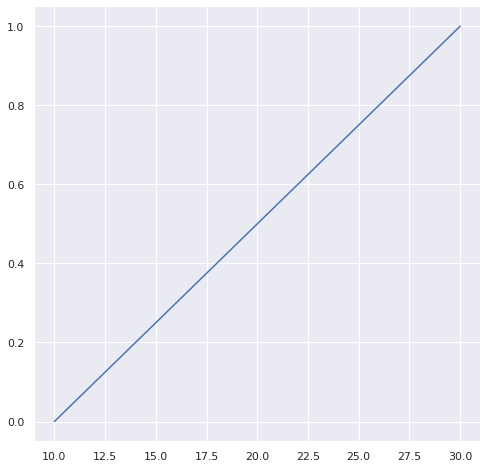

In [0]:
a = 10
b = 30
step = 0.001

F = lambda x : (x - a)/(b-a)

x = np.arange(a,b,step)

plt.plot(x,F(x))

**Ejercicio:** Determine la probabilidad de que la variable $X$, que sigue una función de distribución normal, tome valores menores o iguales a 15. Use la ecuación dada para el cálculo de la probabilidad y use, si es posible, el código de la celda anterior para ilustrar la CDF hasta $x=15$.

Haga doble click **aquí** para ver la solución:





<!-----

# Celda 1: Cálculo mediante la ecuación:

p_x = (15-10)/(30-10)
p_x

# Celda 2: Ilustración la CDF:

a = 10
b = 30
step = 0.001

F = lambda x : (x - a)/(b-a)

x = np.arange(a,b-15,step)

plt.plot(x,F(x))

------>

**Ejercicio::** Determina la media de una variable X que sigue una distribución uniforme en el intervalo cerrado $[a,b]$.

Haga doble click **aquí** para ver la solución:

#<!-----

$\bar{X}=\frac{b-a}{2}+a$

de donde

$\bar{X}=\frac{a+b}{2}$

#------>

## Distribución Normal

La distribución normal, también conocida como **distribución gaussiana**, es es una de las funciones más usadas en Ciencia de datos. Dicha función podrá observarse en varios contextos, especialmente en temas de inferencia estadística. Muchos de los algoritmos de ML suponen que los datos siguen una distribución normal para ser desarrollados.

Una distribución normal presenta una curva de densidad en forma de campana descrita por una media $\mu$ y una desviación estándar $\sigma$. La curva de densidad es simétrica, centrada alrededor de su media, con su extensión determinada por su desviación estándar que muestra que los datos cercanos a la media son más frecuentes que los datos alejados de la media. La función de distribución de probabilidad de una curva de densidad normal con media $\mu$ y desviación estándar $\sigma$ en un punto $x$ puede escribirse como:

\begin{equation}
  f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big(\frac{x-\mu}{\sigma}\big)^2}
\end{equation}

En la siguiente gráfica se ilustran varías distribuciones normales, con diferentes parámetros $\mu$ y $\sigma$.

<img src="https://github.com/diplomado-bigdata-machinelearning-udea/curso0/blob/master/S01/norm_dist.png?raw=true" class="centerImage" alt="CH Logo" height="300" width="400">

### Función acumulativa de una Distribución Normal

La CDF está dada por la suma o integral cumulativa hasta un valor $x$ de la función de densidad de probabilida, esto es:

\begin{equation}
  F(x) = \frac{1}{\sigma\sqrt{2\pi}}\int_{-\infty}^{x} e^{-\frac{1}{2}\big(\frac{x'-\mu}{\sigma}\big)^2} dx'
\end{equation}

o, de forma más compacta 

\begin{equation}
  F(x) = \frac{1}{2}\bigg[1+\text{erf}\bigg(\frac{x-\mu}{\sigma\sqrt{2}}\bigg)\bigg]
\end{equation}

donde erf$(x)$ es la funcion de error y está definida como 

\begin{equation}
  \text{erf}(x) = \frac{1}{\sqrt{2}}\int_0^x e^{-x'^2/2}dx'
\end{equation}

En la siguiente gráfica se ilustra la CDF para varias distribuciones normales.


<img src="https://github.com/diplomado-bigdata-machinelearning-udea/curso0/blob/master/S01/cdf_norm.png?raw=true" class="centerImage" alt="CH Logo" height="300" width="400">



Veamos a continuación un ejemplo en `python` de una distribución de números aleatorios que sigue una distribución normal.

In [0]:
from scipy.stats import norm
# Generador de un números N(0,1) con una distribución normal
data_normal = norm.rvs(size=10000,loc=0,scale=1)
# Nota: loc representa la mediana y scale la desviación estándar

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

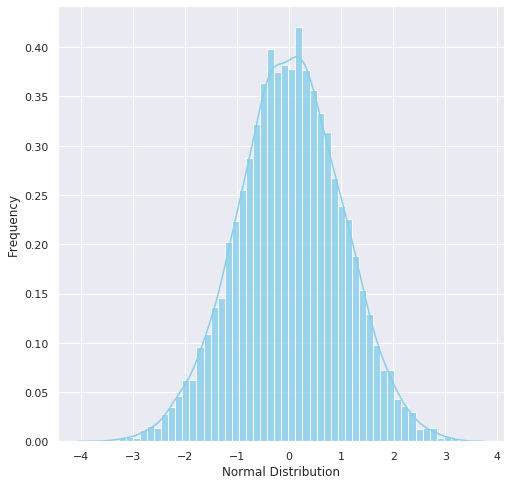

In [0]:
ax = sns.distplot(data_normal, bins=50, kde=True, color='skyblue', hist_kws={"linewidth": 1,'alpha':0.8})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

Nótese que la desviación estándar de los datos es efectivamente 1:

In [0]:
std_norm = np.std(data_normal)
std_norm

1.0023475858719288

**Ejercicio:** Que deberia modificar en el código anterior para obtener una distribución de números el doble de ancha y centrada en $-2$.

Haga doble click **aquí** para ver la respuesta.

<!-------------

# Los parámetros loc y scale, determinan la media $\mu$ y la desviación estándar $\sigma$, respectivamente. Si fijamos `loc=-2` y `scale=2`, obtendríamos el resultado requerido.

------>

**Ejercicio:** Explore qué pasa con la modificación de los parámetros `loc` y `scale` en la generación de los datos de la distribución normal y visualice el resultado en la gráfica de la distribución. Para esto, haga uso de las celdas anteriores.

**Nota:** Una vez realizado el ejercicio, restablezca los valores de los parámetros `loc` y `scale` y vuelva a correr las celdas.

La siguiente figura representa una descripción de la distribución en términos de la dispersión $\sigma$ de los datos.

<img src="https://github.com/diplomado-bigdata-machinelearning-udea/curso0/blob/master/S01/std_num_data.png?raw=true" class="centerImage" alt="CH Logo" height="300" width="400">

En la figura se ilustra, por ejemplo, que el $68$% de los datos se encuentran dentro de una distancia de una desviación estándar respecto de la media $\mu$; el $95$% de los datos, a una distancia de 2$\sigma$; el $99.7$% de los datos a una distancia de $3\sigma$; etc.

Vale la pena mencionar que una distribución con media 0 y desviación estándar 1 se le conoce como **distribución normal estándar**.

En la siguiente celda se tiene un pequeño programa que calcula el porcentaje de datos contenidos dentro de un número de desviaciones estándar `num_std`. Comprobemos con los datos que hemos creado en esta sección, y que siguen una distribución normal, si se cumple, por ejemplo, que el $68$% de los datos se encuentra una distancia $\sigma$ de la media.

In [0]:
num_std = 1.
n_std = data_normal[data_normal>=-num_std*std_norm]
n_std = n_std[n_std<=num_std*std_norm]
(n_std.shape[0]/data_normal.shape[0])*100

100.0

**Ejercicio:** Determine mediante el código anterior, los porcentajes de datos comprendidos a una distancia de $2\sigma$ y $3\sigma$ de la media.

Para obtener una ayuda haga doble click **aquí**

<!-----

el parámetro num_std determina el número de desviaciones estándar que nos alejamos a izquierda y derecha del valor medio.

----->

## Distribución Gamma

La distribución Gamma es una familia de distribuciones de probabilidad continuas de dos parámetros. Si bien dicha función es usada en muy pocos casos en su forma original, funciones más populares como la **distribución exponencial**, **chi-cuadrado** y **erlang**, representan casos especiales de la distribución gamma. La distribución gamma puede parametrizarse en términos de un parámetro de forma $\alpha=\kappa$ y un parámetro de escala inversa $\beta=1/\theta$, llamado parámeto de razón (rate); el símbolo $\Gamma(n)$ es la función gamma definida como $(n-1)!$. Matemáticamente, la función gamma se define como:

\begin{equation}
  f(x;\alpha, \beta)=\frac{\beta^\alpha x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)} \text{ para } x>0 \text{ y } \alpha,\beta >0.
\end{equation}

En la siguiente gráfica se ilustra la función gamma para fiferentes parámetros $\alpha=\kappa$ y $\beta=1/\theta$


<img src="https://github.com/diplomado-bigdata-machinelearning-udea/curso0/blob/master/S01/gamma_distribution.png?raw=true" class="centerImage" alt="CH Logo" height="300" width="400">

Los casos más representativos de la función gamma se presentan cuando $\alpha$ es un entero, en cuyo caso la distribución gamma se reduce a una distribución Earlang; o cuanddo $\alpha=1$, en donde la distribución gamma se reduce a una distribución exponencial.





### Función acumulativa de una distribución gamma

La función cumulativa de la distribución gamma correspone la función regularizada gamma, que puede determinarse de forma matemática como

\begin{equation}
  F(x;\alpha,\beta)=\int_0^x f(u;\alpha,\beta)du=\frac{\gamma(\alpha,\beta x)}{\Gamma(\alpha)}
\end{equation}

siendo $\gamma(\alpha,\beta x)$ la función gamma incompleta menor. En la siguiente gráfica se ilustra la función cumulativa gamma para diferentes parámetros $\alpha=\kappa$ y $\beta=1/\theta$.

<img src="https://github.com/diplomado-bigdata-machinelearning-udea/curso0/blob/master/S01/cdf_gamma.png?raw=true" class="centerImage" alt="CH Logo" height="300" width="400">

Veamos un pequeño ejemplo de una districión gamma en Python.

Para cambiar la distribución podemos usar los siguiente argumentos:

- `loc`: inicio de la distribución
- `scale` para determinar el ancho de la distribución 
- `size` determina el número el número de variables aleatorias en la distribución.

In [0]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, loc=2, scale=1, size=10000)

[Text(0, 0.5, 'Frecuencia'), Text(0.5, 0, 'Distribución')]

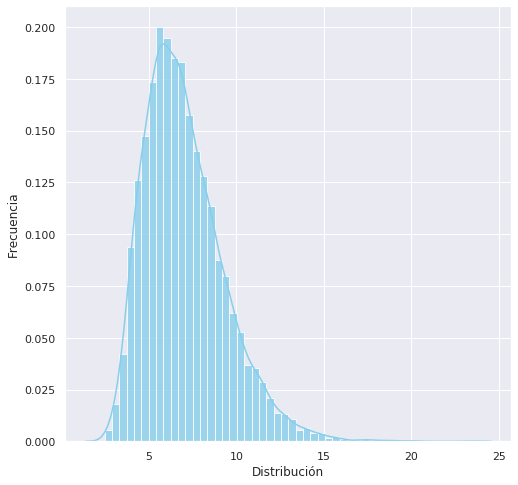

In [0]:
ax = sns.distplot(data_gamma, kde=True, bins=50, color='skyblue', hist_kws={"linewidth": 1,'alpha':0.8})
ax.set(xlabel='Distribución', ylabel='Frecuencia')

## Distribución exponencial

La distribución exponencial describe el tiempo entre eventos en un proceso de puntual de Poisson, es decir, un proceso en el que los eventos ocurren a una tasa promedio constate, de forma continua e independiente. Tiene un parámetro $\lambda$ llamado parámetro de velocidad, y su ecuación se describe como:

\begin{equation*}
  f(x) = \begin{cases}
        \lambda e^{-\lambda x} \text{ si } x \geq 0,
        \\
        0 \text{ si } x<0
        \end{cases}
 \end{equation*} 


En la siguiente figura se iluesta la distribución exponencial para diferentes parámetros $\lambda$:

 <img src="https://github.com/diplomado-bigdata-machinelearning-udea/curso0/blob/master/S01/exp_distribution.png?raw=true" class="centerImage" alt="CH Logo" height="300" width="400">




### Función cumulativa de una distribución exponencial

La función cumulativa de una distribución exponencial esta dada por la expresión:

\begin{equation*}
  f(x) = \begin{cases}
        1- e^{-\lambda x} \text{ si } x \geq 0,
        \\
        0 \text{ si } x<0
        \end{cases}
 \end{equation*} 

 En la siguiente figura se ilustra la función cumulativa para diferentes valores de $\lambda$.

 <img src="https://github.com/diplomado-bigdata-machinelearning-udea/curso0/blob/master/S01/exp_cdf.png?raw=true" class="centerImage" alt="CH Logo" height="300" width="400">

Veamos un ejemplo en `python`  de una distribución exponencial.


In [0]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

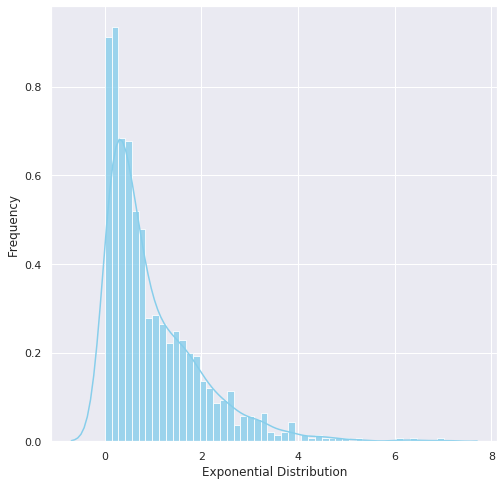

In [0]:
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=50,
                  color='skyblue',
                  hist_kws={"linewidth": 1,'alpha':0.8})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

## Distribución de Poisson

Un variable aleatoria de Poisson se usa generalmente para modelar la cantidad de veces que ocurre un evento en un intervalo de tiempo. Por ejemplo, el número de usuarios que visita un sitio web en un intervalo dado representa un proceso de Poisson. La distribución de Poisson se describe en términos de la tasa ($\mu$) a la que ocurren los eventos. Un evento puede ocurrir $0, 1, 2,\cdots$ veces en un intervalo de tiempo. El número promedio de eventos en un tiempo $t$ se designa como $\lambda$. Lambda es la tasa de eventos, y es llamada parámetro de tasa. La probabilidad de observar $k$ eventos en un intervalo viene dada por la ecuación:

\begin{equation}
  P(k \text{ eventos en }\delta t)=\frac{e^{-\lambda}\lambda^k}{k!}
\end{equation}

Nótese que la distribución normal es un caso especial de la distribución de Poisson cuando $\lambda\rightarrow\infty$. Además, si los tiempos entre eventos aleatorios siguen una distribución exponencial con tasa $\lambda$, entonces el número total de eventos en un período de tiempo $t$ sigue la distribución de Poisson con el parámetro $\lambda t$.

En la figura se siguiente se ilustra la función 

<img src="https://github.com/diplomado-bigdata-machinelearning-udea/curso0/blob/master/S01/poisson_dist.png?raw=true" class="centerImage" alt="CH Logo" height="300" width="400">


La función cumulativa de Poisson para diferentes valores de $\lambda$ se muestra a continuación:

<img src="https://github.com/diplomado-bigdata-machinelearning-udea/curso0/blob/master/S01/poisson_cdf.png?raw=true" class="centerImage" alt="CH Logo" height="300" width="400">


A continuación se ilustra la creación de un conjunto de datos discretos que siguen una distribución de Poisson en `python`:

In [0]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

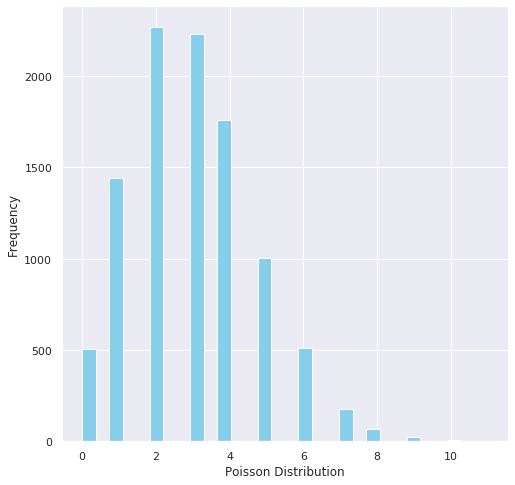

In [0]:
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 1,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

## Distribución binomial

Una binomial es aquella en la que solo son posibles dos resultados, como el éxito o el fracaso, la ganancia o la pérdida, y donde la probabilidad de éxito y fracaso es la misma para todos los ensayos. Sin embargo, los resultados no necesitan ser igualmente probables, y cada ensayo es independiente el uno del otro. Los parámetros de una distribución binomial son $n$ y $p$, donde $n$ es el número total de ensayos, y $p$ es la probabilidad de éxito en cada prueba. La distribución de probabilidad viene dada por:

\begin{equation}
   f(k,n,p) = Pr(k;n,p)  =  \binom{n}{k} (1-p)^kq^{n-k}
\end{equation}

en donde 

\begin{equation}
  \binom{n}{k}=\frac{n!}{k!(n-k)!}
\end{equation}

En la siguiente figura se ilistra la distribución binomial para diferentes probabilidades $p$ de exito y un diferentes ensayos $n$.

<img src="https://github.com/diplomado-bigdata-machinelearning-udea/curso0/blob/master/S01/binom_distri.png?raw=true" class="centerImage" alt="CH Logo" height="300" width="400">

### Función acumulativa de una distribución binomial

En la siguiente figura se ilusta la función cumulativa de una distribución binomal para diferentes valores de probabilidades y número de intentos.

<img src="https://github.com/diplomado-bigdata-machinelearning-udea/curso0/blob/master/S01/cdf_binom.png?raw=true" class="centerImage" alt="CH Logo" height="300" width="400">

En el siguiente código se ejemplifica como producir una distribución binomial de un un conjunto de datos en `python`.

In [0]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)

In [0]:
data_binom.shape

(10000,)

[Text(0, 0.5, 'Frecuencia'), Text(0.5, 0, 'Distribución Binomial')]

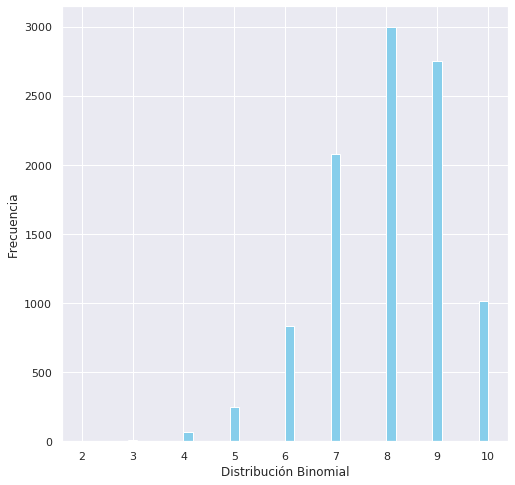

In [0]:
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 1,'alpha':1})
ax.set(xlabel='Distribución Binomial', ylabel='Frecuencia')

**Ejercicio:** La distribución binomial tiende a una distribución de Poisson en el caso en que:

- El número de intentos es muy grande, $n\rightarrow\infty$
- La probabilidad de exito en cada intento es el mismo y muy pequeño, $p\rightarrow 0$.
- $np=\lambda$, es finito.

Usando el código anterior, demuestre visualmente que la distribucion binomial tiende a una distribución de Poisson. Para ello, establezca una probabilidad de exito $p$ baja, y un número de intentos $n$ alto. Verifique que $np$ es "finita".


**Ejercicio:** La distribución binomial tiende a una distribución normal  en el caso en que

- El número de intentos es muy grande, $n\rightarrow\infty$
- La probabilidad de exito no es indefinidamente pequeña.

Usando el código anterior, demuestre visualmente que la distribucion binomial tiende a una distribución de Normal. Para ello, establezca una probabilidad de exito $p$ finita, y un número de intentos $n$ alto.

## Distribución de Bernoulli

Una distribución de Bernoulli es aquella que produce solo dos resultados posibles, a saber, $1$ (éxito) y $0$ (fracaso), y una única prueba, por ejemplo, un lanzamiento de moneda. Entonces, la variable aleatoria $X$ que tiene una distribución de Bernoulli puede tomar el valor 1 con la probabilidad de éxito, $p$, y el valor 0 con la probabilidad de falla, $q$ o $1 − p$. Las probabilidades de éxito y fracaso no tienen por qué ser igualmente probables. La distribución de Bernoulli es un caso especial de la distribución binomial donde se realiza un solo ensayo (n = 1). Su función de masa de probabilidad viene dada por:

\begin{equation}
  f(k;p)=p^k(1-p)^{1-k} \text{ para } k \in \{0,1\}
\end{equation}

Podemos generar una variable aleatoria discreta que sigue una distribución de Bernoulli en `python` mediante las siguientes líneas de código:

In [0]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.6)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

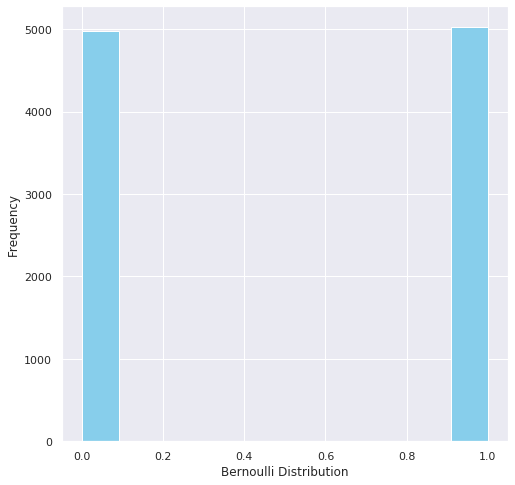

In [0]:
ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 1,'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

**Ejercicio:** Mediante el código anterior, identifique el parámetro adecuado y modifíquelo para simular el resultado del lanzamiento de una moneda.

Para obtener una ayuda haga doble click **aquí**

<!-----

La probabilidad p es el parámetro que determina la probabilidad de exito. Esta probabilidad debe ser igual para el exito y el fracaso.
----->

## Ejemplos prácticos de distribuciones

### Lanzamiento de dados (Distribución uniforme)

A continuación se realiza una pequeña simulación de un dado de seis caras. En la variable `n_lanzadas` se determina el número de veces que se lanza el dato. En una primera parte, se lanza el dado 100 veces y se realiza un histograma del número de veces que se obtiene cada número del dado. Después de dicho código encontrará unas preguntas cortas para resolver usando el simulador del dado.

In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt

min = 1
max = 6

n_lanzadas = 100

dice_p = np.array([0,0,0,0,0,0]) 
for i in range(n_lanzadas):
  result = random.randint(min, max)
  dice_p[result-1] += 1

dice_p

array([23, 17, 18, 16,  9, 17])

<BarContainer object of 6 artists>

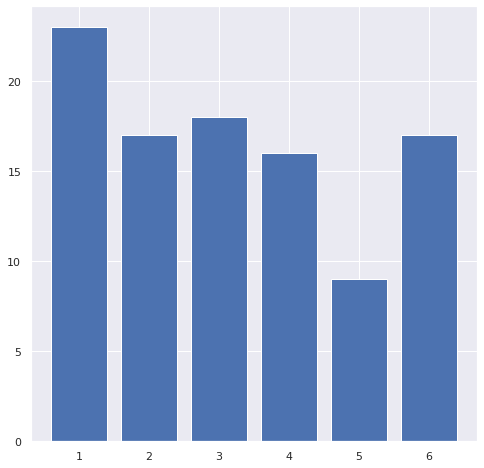

In [0]:
plt.bar([1,2,3,4,5,6],dice_p)

**Ejercicio:** Según los resultados del número de veces que se obtiene cada número después de 1000 lanzadas, ¿Cuál es la probabilidad de obtener cada número?.

Para obtener una ayuda haga doble click **aquí**

<!-----

Para obtener la probabilidad de cada una de las caras del dado, divida el número de veces que obtiene una cara entre el número total de lanzamientos.

----->

**Ejercicio**: ¿Que necesitaría cambiar en los parámetros del ejemplo anterior para demostrar todas las cara de nuestro dado virtual son equiprobables. 

Para obtener una ayuda haga doble click **aquí**

<!-----

Para obtener una probabilidad equiprobable, lance muchas veces el dado y recalcule las probabilidades como se hizo en el ejercicio anterior.
----->

### Caminata aleatoria (Distribución normal)

En el siguiente ejemplo se ilustra el problema de la caminada aleatoria en una dimension. Este problema fija un punto de inicio de la caminata y se tiene como condición que la probabilidad de dar un paso a derecha o izquierda del es la misma. Luego de unos pasos de la caminata, se determina la posición final. Esta caminata se repite varias veces para establecer un histograma de distancias, el cual seguirá una distribución normal.

![alt text](https://media.giphy.com/media/MZmimJCtlaBxe/giphy.gif)

 Para 800 pasos, la distancia promedio al centro es =   0.0


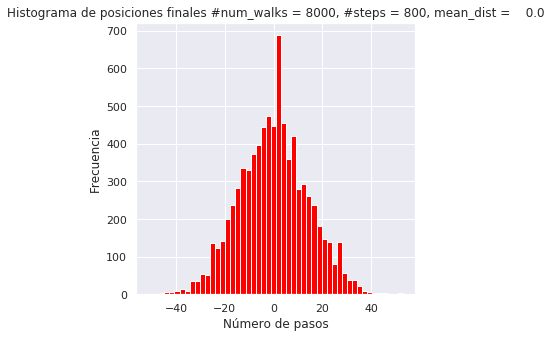

In [0]:
#  Caminata aleatoria 1D

import random
import numpy as np
import matplotlib.pyplot as plt

def random_walk(steps, step_size):
    walk = 0
    for i in range(steps):
        walk += step_size*random.choice([-1,1])
    return walk

num_walks = 8000
num_steps = 800 
step_size = 0.5

#  Realización de varias caminatas y almacenamiento de la distancia total.

last_pos = np.zeros(num_walks)
for i in range(num_walks):      
    walk = random_walk(num_steps,step_size)
    last_pos[i] = walk


mean_dist = np.average(last_pos);


print(' Para %d pasos, la distancia promedio al centro es = %5.1f' %(num_steps, mean_dist))
# Gráfica
plt.title('Histograma de posiciones finales #num_walks = %i, #steps = %i, mean_dist = %6.1f' % (num_walks,num_steps, mean_dist))
plt.hist(last_pos, bins=50, color='red') 
plt.xlabel('Número de pasos')
plt.ylabel('Frecuencia')
plt.show() 
